In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Load data

In [2]:
def load_tweets(filename, label):
    tweets = []
    labels = []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            s = line.rstrip()
            if label is None:
                s = s[s.find(',')+1:]
            tweets.append(s)
            if label is not None:
                labels.append(label)
    return tweets, labels

neg_tweets, neg_labels = load_tweets('../data/train_neg_full.txt', label=0)
pos_tweets, pos_labels = load_tweets('../data/train_pos_full.txt', label=1)
test_tweets, _ = load_tweets('../data/test_data.txt', label=None)

train_tweets = neg_tweets + pos_tweets
train_labels = neg_labels + pos_labels

print(f"{len(train_tweets)} tweets from the train set")
print(f"{len(test_tweets)} tweets from the test set")

2500000 tweets from the train set
10000 tweets from the test set


## Create Pandas DataFrame

Create a dataframe with tweet's length

In [3]:
train_df = pd.DataFrame(columns=["tweet", "label"])
test_df = pd.DataFrame(columns=["tweet"]) 
train_df["tweet"] = train_tweets
test_df["tweet"] = test_tweets
train_df["label"] = train_labels
train_df["length"] = [len(t) for t in train_tweets]
test_df["length"] = [len(t) for t in test_tweets]

Reformatting the columns to the correct type

In [4]:
train_df["tweet"] = train_df["tweet"].apply(str)
train_df["length"] = train_df["length"].apply(int)
train_df["label"] = train_df["label"].apply(int)
test_df["tweet"] = test_df["tweet"].apply(str)
test_df["length"] = test_df["length"].apply(int)

In [5]:
train_df.dtypes

tweet     object
label      int64
length     int64
dtype: object

In [6]:
test_df.dtypes

tweet     object
length     int64
dtype: object

In [7]:
display(train_df)
display(test_df)

,tweet,label,length
0,vinco tresorpack 6 ( difficulty 10 of 10 objec...,0,122
1,glad i dot have taks tomorrow ! ! #thankful #s...,0,52
2,1-3 vs celtics in the regular season = were fu...,0,82
3,<user> i could actually kill that girl i'm so ...,0,57
4,<user> <user> <user> i find that very hard to ...,0,63
...,...,...,...
2499995,a warning sign ? (; rt <user> the negativity y...,1,116
2499996,<user> ff too thank youuu ) ),1,29
2499997,i just love shumpa ! that's my girl,1,35
2499998,the best way to start a day ! no matter what h...,1,84


,tweet,length
0,sea doo pro sea scooter ( sports with the port...,118
1,<user> shucks well i work all week so now i ca...,121
2,i cant stay away from bug thats my baby,39
3,<user> no ma'am ! ! ! lol im perfectly fine an...,75
4,"whenever i fall asleep watching the tv , i alw...",73
...,...,...
9995,had a nice time w / my friend lastnite,38
9996,<user> no it's not ! please stop !,34
9997,not without my daughter ( dvd two-time oscar (...,124
9998,<user> have fun in class sweetcheeks,36


In [8]:
train_df.to_csv("../data/raw_train.csv", index=False)
test_df.to_csv("../data/test.csv", index=False)

## Analysis

### Tweet's length

In [9]:
train_df["length"].describe(percentiles=[.25, .5, .75, .95, .99])

count   2500000.0000
mean         75.9641
std          35.4258
min           3.0000
25%          46.0000
50%          71.0000
75%         111.0000
95%         128.0000
99%         138.0000
max         401.0000
Name: length, dtype: float64

In [10]:
test_df["length"].describe(percentiles=[.25, .5, .75, .95, .99])

count   10000.0000
mean       75.8403
std        34.9308
min        10.0000
25%        46.0000
50%        70.0000
75%       110.0000
95%       129.0000
99%       137.0000
max       171.0000
Name: length, dtype: float64

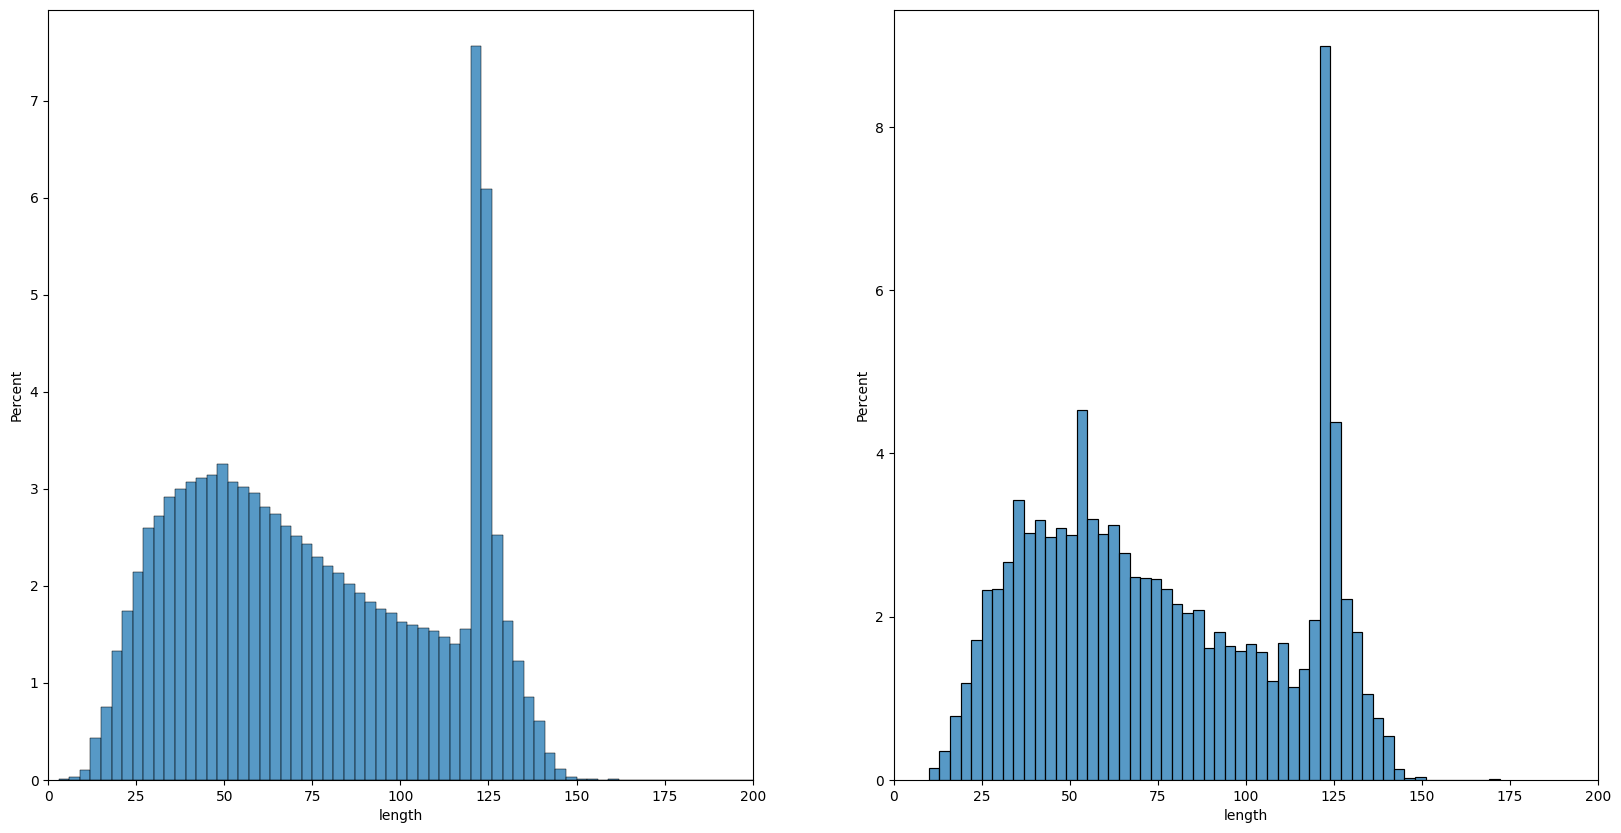

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(train_df["length"], ax=ax[0], binwidth=3, stat="percent")
sns.histplot(test_df["length"], ax=ax[1], binwidth=3, stat="percent")
ax[0].set_xlim(0, 200)
ax[1].set_xlim(0, 200)
plt.show()

### Train set class ratio

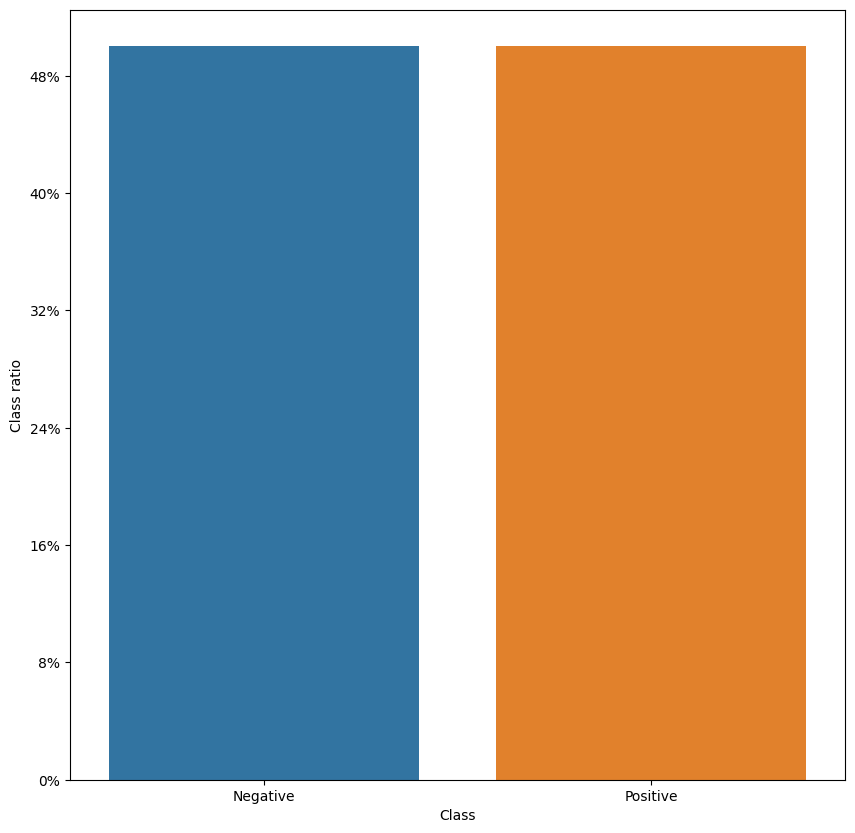

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

total = len(train_df["label"])
sns.countplot(x=train_df["label"], ax=ax)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=total))
ax.set_ylabel("Class ratio")
ax.set_xlabel("Class")
ax.set_xticklabels(["Negative", "Positive"])

plt.show()